In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

Using flux=620 for SNR=5 (see cell #4 of notebook '30. 4a. other psf models-real PSFs')

In [2]:
testObj = dit.DiffimTest(varFlux2=np.repeat(620., 50), sourceFluxRange=(600, 120000))

HEREXXX: 550


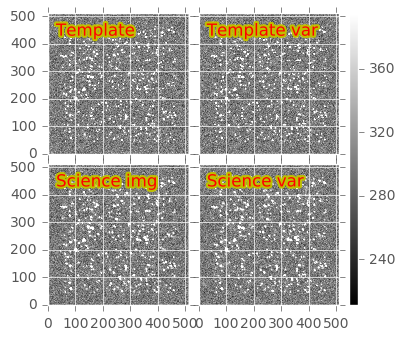

In [3]:
testObj.doPlot();

In [4]:
actualPsf1 = testObj.im2.psf.copy()
im2 = testObj.im2.asAfwExposure()
res2 = dit.tasks.doMeasurePsf(im2, detectThresh=5.0, measurePsfAlg='psfex', spatialOrder=1)

N SOURCES: 247


In [5]:
res2.cellSet

In [6]:
bbox = im2.getBBox()
xcen = (bbox.getBeginX() + bbox.getEndX()) / 2.
ycen = (bbox.getBeginY() + bbox.getEndY()) / 2.
bbox, xcen, ycen

(Box2I(Point2I(0, 0), Extent2I(512, 512)), 256.0, 256.0)

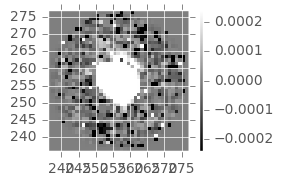

In [7]:
import lsst.afw.geom as afwGeom
img = res2.psf.computeImage(afwGeom.Point2D(xcen, ycen))
dit.plotImageGrid((img,))

In [8]:
psf = res2.psf

In [9]:
actualPsf1 = testObj.im2.psf.copy()
im2 = testObj.im2.asAfwExposure()
res2 = dit.tasks.doMeasurePsf(im2, detectThresh=20.0, measurePsfAlg='pca', spatialOrder=0)
len(res2.cellSet.getCellList())

N SOURCES: 165


16

In [10]:
img = res2.psf.computeImage(afwGeom.Point2D(xcen, ycen))

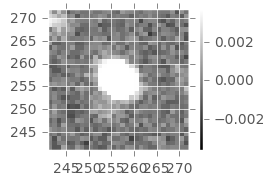

In [11]:
dit.plotImageGrid((img,))

In [12]:
n_runs = 1
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620., n_runs=n_runs, 
                                             remeasurePsfs=[False, True])

RUNNING: 1
CORES: 3
N SOURCES = 500
N SOURCES: 470


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:   12.1s remaining:    0.0s
[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:   12.1s finished


In [13]:
tr = testResults1[0]

In [14]:
tr['psfInfo']

{'inputPsf1': None,
 'inputPsf2': None,
 'inputShape1': None,
 'inputShape2': [1.989961637274519,
  4.039946238041112,
  4.039946238041112,
  -0.799989278877403],
 'moments1': None,
 'moments2': (-0.06529368019264839, -0.0053731498205825722),
 'nSources': 500,
 'normedRms1': None,
 'normedRms2': 0.0036516511440084568,
 'psf1': None,
 'psf2': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 'rms1': None,
 'rms2': 0.00022579048270943543,
 'seed': 66,
 'shape1': None,
 'shape2': [1.9874284208610966,
  4.031398010843546,
  4.025211245959412,
  -0.7910385212904203]}

In [15]:
testObj = dit.DiffimTest(varFlux2=np.repeat(620., 50), n_sources=50, sourceFluxRange=(600, 120000))

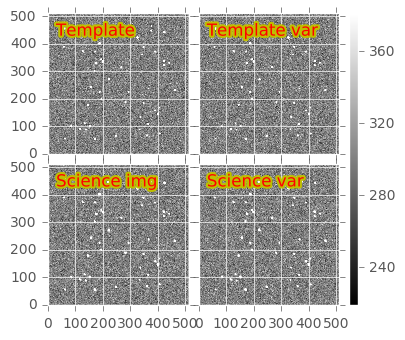

In [16]:
testObj.doPlot();

In [2]:
testObj = dit.DiffimTest(varFlux2=np.repeat(620., 10), n_sources=3000, sourceFluxRange=(600, 120000),
                        avoidAllOverlaps=15., templateNoNoise=True, skyLimited=False)

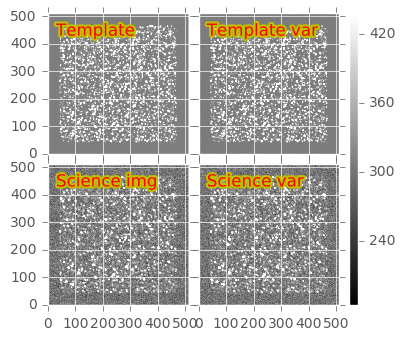

In [3]:
testObj.doPlot();

In [4]:
res = testObj.runTest(returnSources=True)

In [6]:
del res['sources']
res

{'ALstack': {'FN': 4, 'FP': 1, 'TP': 6},
 'ALstack_decorr': {'FN': 5, 'FP': 1, 'TP': 5},
 'SZOGY': {'FN': 5, 'FP': 2, 'TP': 5},
 'ZOGY': {'FN': 5, 'FP': 1, 'TP': 5}}

In [48]:
res1 = dit.multi.runTest(flux=620., n_varSources=50, n_sources=300, returnObj=True,
                        templateNoNoise=True, skyLimited=True)
#del res1['result']['sources']
res1['result']

{'ALstack': {'FN': 32, 'FP': 6, 'TP': 18},
 'ALstack_decorr': {'FN': 33, 'FP': 6, 'TP': 17},
 'SZOGY': {'FN': 33, 'FP': 10, 'TP': 17},
 'ZOGY': {'FN': 32, 'FP': 10, 'TP': 18}}

In [49]:
res2 = dit.multi.runTest(flux=620., n_varSources=50, n_sources=300, 
                         templateNoNoise=True, skyLimited=True,
                         remeasurePsfs=[False, True], returnObj=True)
#del res2['result']['sources']
res2['result']

{'ALstack': {'FN': 32, 'FP': 6, 'TP': 18},
 'ALstack_decorr': {'FN': 33, 'FP': 6, 'TP': 17},
 'SZOGY': {'FN': 37, 'FP': 26, 'TP': 13},
 'ZOGY': {'FN': 33, 'FP': 48, 'TP': 17}}

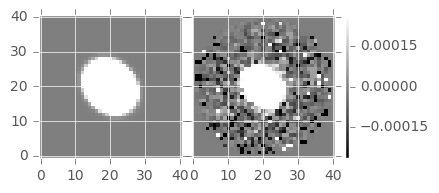

In [50]:
dit.plotImageGrid((res2['psfInfo']['inputPsf2'], res2['psfInfo']['psf2']))

A&L(dec): stats(mean=0.031939507, stdev=17.300297, min=-62.248547, max=67.556473)
ZOGY: stats(mean=0.055194184194928907, stdev=17.343149241691624, min=-136.63312948797122, max=124.53156553388666)
A&L(dec) - ZOGY: stats(mean=0.1151155926196266, stdev=0.13191485464094851, min=-1.885849236404094, max=3.7287410725723653)
A&L(dec) - A&L: stats(mean=-0.00028852458, stdev=0.053592436, min=-0.4165802, max=0.39334106)


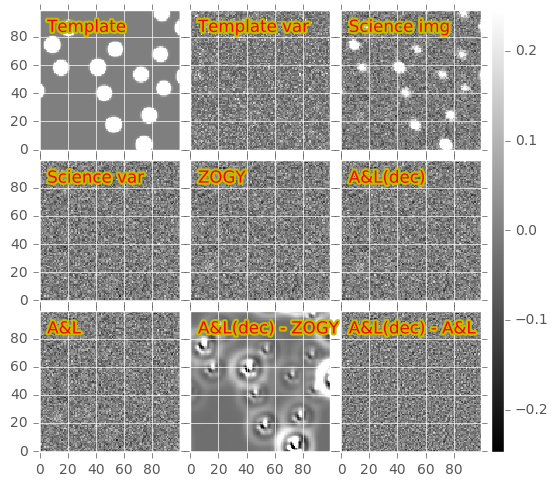

In [51]:
res1['obj'].doPlot(centroidCoord=[284,235,50]);

A&L(dec): stats(mean=0.030851863, stdev=17.300323, min=-62.251286, max=67.554626)
ZOGY: stats(mean=0.13879063827183516, stdev=12.595587424554386, min=-294.62310225959726, max=60.54926627275389)
A&L(dec) - ZOGY: stats(mean=0.11703423283778674, stdev=10.856736513934182, min=-44.257442005598612, max=51.267676624876835)
A&L(dec) - A&L: stats(mean=-0.00028946548, stdev=0.053589877, min=-0.41574097, max=0.39312744)


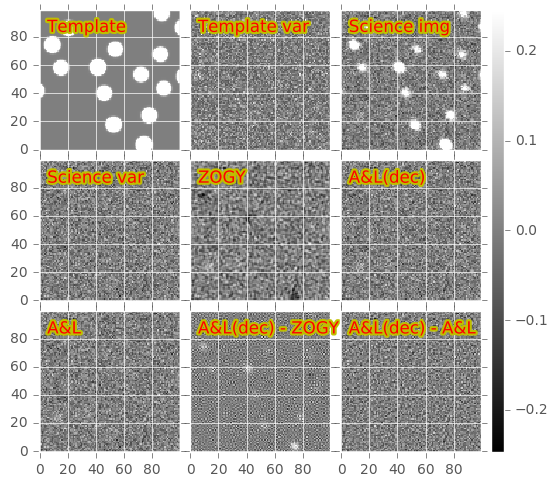

In [52]:
res2['obj'].doPlot(centroidCoord=[284,235,50]);